# Computer Vision Bootcamp: Assignment 3

## Reading

In [ ]:
# Import the needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from ulrtalytics import YOLO


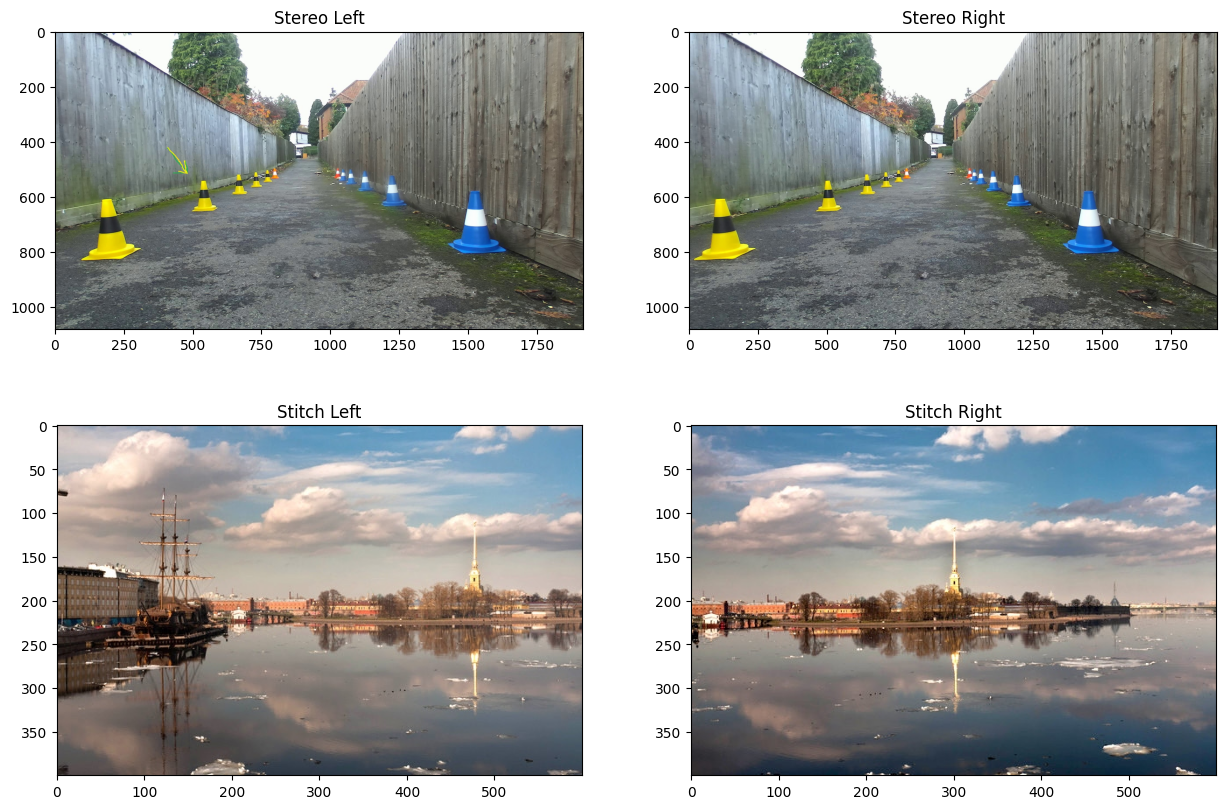

In [ ]:
# read the images and show them in one figure in RGB
stereo_left = cv2.imread('stereo_left.jpg')
stereo_right = cv2.imread('stereo_right.jpg')
stitch_left = cv2.imread('stitch_left.jpg')
stitch_right = cv2.imread('stitch_right.jpg')

stereo_left = cv2.cvtColor(stereo_left, cv2.COLOR_BGR2RGB)
stereo_right = cv2.cvtColor(stereo_right, cv2.COLOR_BGR2RGB)
stitch_left = cv2.cvtColor(stitch_left, cv2.COLOR_BGR2RGB)
stitch_right = cv2.cvtColor(stitch_right, cv2.COLOR_BGR2RGB)

# Plot images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(stereo_left, cmap='gray')
plt.title('Stereo Left')

plt.subplot(2, 2, 2)
plt.imshow(stereo_right, cmap='gray')
plt.title('Stereo Right')

plt.subplot(2, 2, 3)
plt.imshow(stitch_left, cmap='gray')
plt.title('Stitch Left')

plt.subplot(2, 2, 4)
plt.imshow(stitch_right, cmap='gray')
plt.title('Stitch Right')

plt.show()


## Image Stitching

In [ ]:
# define and use the stitcher
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch([stitch_left, stitch_right])


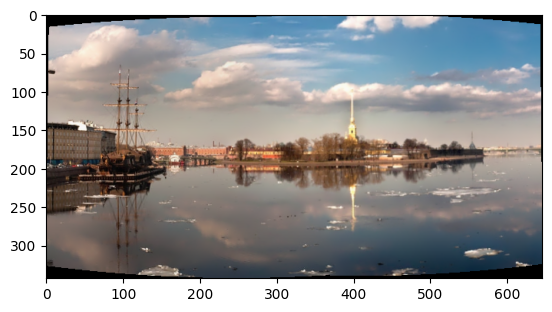

In [ ]:
# Show the stitiched (result) image
plt.imshow(result, cmap='gray')

plt.show()

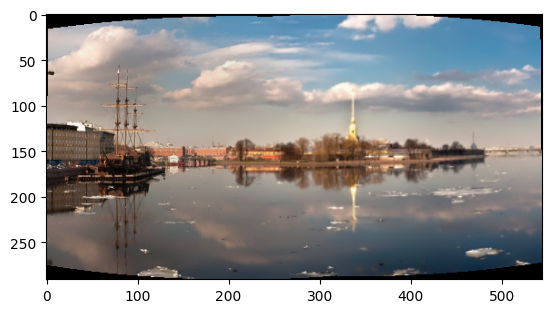

In [ ]:
# use the scaling function, scale the right image by a factor of 0.5 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_stitch_right = cv2.resize(stitch_right, None, fx=0.5, fy=0.5)

status, result = stitcher.stitch([stitch_left, scaled_stitch_right])
plt.imshow(result, cmap='gray')

plt.show()


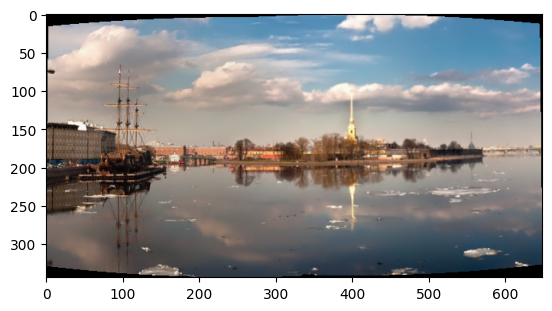

In [ ]:
# use the scaling function, scale the right image by a factor of 0.75 and show the results of stitching it with the unchanged left image (if there is a result)
scaled_stitch_right = cv2.resize(stitch_right, None, fx=0.75, fy=0.75)

status, result = stitcher.stitch([stitch_left, scaled_stitch_right])
plt.imshow(result, cmap='gray')

plt.show()

## Depth

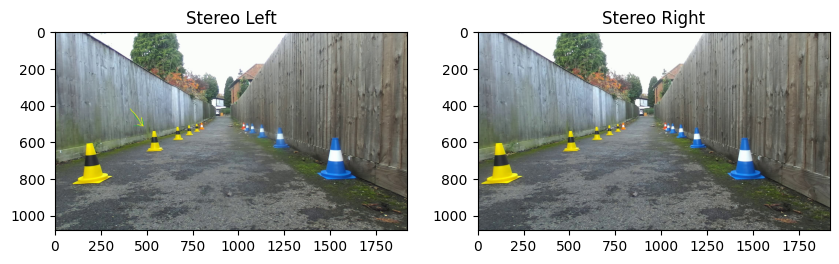

In [ ]:
# Load the stereo images and show them in RGB
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(stereo_left)
plt.title('Stereo Left')

plt.subplot(1, 2, 2)
plt.imshow(stereo_right)
plt.title('Stereo Right')

plt.show()

<ipython-input-29-e2944113144f>:18: RuntimeWarning: divide by zero encountered in divide
  depth = focal_length * baseline / disparity


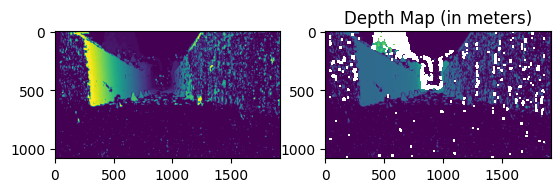

In [ ]:
# convert both images to a suitable colour space
stereo_left = cv2.imread('stereo_left.jpg', 0)
stereo_right = cv2.imread('stereo_right.jpg', 0)

# stereo_left = cv2.cvtColor(stereo_left, cv2.COLOR_BGR2RGB)
# stereo_right = cv2.cvtColor(stereo_right, cv2.COLOR_BGR2RGB)

# Define and use the stereo function
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=19) # numDisparities = (xx * 16) , blockSize is odd

# Using a focal length of 13000 and a baseline of 120mm, find the depth in meters
disparity = stereo.compute(stereo_left, stereo_right)
disparity[disparity == 0] = 0.1

focal_length = 13000
baseline = 120  # in millimeters

depth = focal_length * baseline / disparity

# show the depth map
plt.subplot(1,2,1)
plt.imshow(disparity)

plt.subplot(1,2,2)
plt.imshow(depth)
plt.title('Depth Map (in meters)')

plt.show()

What is the depth of the cone with the yellow arrow in the left image?  ***3.8m***

## Live Object detection

This task is done locally, download ultralytics locally and run a live detection using your laptop's camera a screenshot of how you detected an object in your room